In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [4]:
trd=pd.read_csv('train.csv')
tsd=pd.read_csv('test.csv')

        

In [5]:
td=pd.concat([trd, tsd], ignore_index=True, sort= False)

In [6]:
td.shape
#pclass_perc_df

(1309, 12)

In [7]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:

td.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

ValueError: DataFrame constructor not properly called!

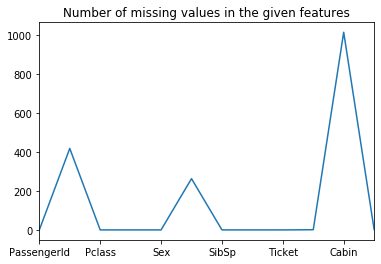

In [10]:
pd.DataFrame(td.isnull().sum().plot.line().set_title('Number of missing values in the given features'))


In [ ]:
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [ ]:
td.nunique()

In [ ]:
(td.Survived.value_counts(normalize=True)*100).plot.barh().set_title('Training Data-Percentage of people survived and decesed')

In [ ]:
fig_pclass=td.Pclass.value_counts().plot.pie().legend(labels=['Class 3', 'Class1', 'Class2'],
loc="center right", bbox_to_anchor=(2.25,0.5)).set_title("Training Data - People travelling in different classes")

#fig_pclass = td.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - People travelling in different classes")

In [ ]:
#pclass_1_survivor_distribution=round((tdf[tdf.Pclass==1].Survived==1).value_counts()
#                                    [1]/len(tdf[tdf.Pclass==1])*100,2)
#pclass_2_survivor_distridution=round((tdf[tdf.Pclass==2].Survived==2).values_counts()
#                                    [1]/len(tdf[tdf.Pclass==2])*100,2)
#pclass_3_survivor_distribution=round((tdf[tdf.Pclass==3].Survived==3).values_counts()
#                                    [1]/len(tdf[tdf.Pclass==3])*100,2)

In [ ]:
pclass_1_survivor_distribution = round((trd[trd.Pclass == 1].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((trd[trd.Pclass == 2].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((trd[trd.Pclass == 3].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

In [ ]:
for x in [1, 2, 3]:
    trd.Age[trd.Pclass==x].plot(kind='kde')
plt.title('Age density in classes')
plt.legend(('1st','2nd','3rd'))

In [ ]:
for x in ["male","female"]:
    td.Pclass[td.Sex == x].plot(kind="kde")
plt.title("Training Data - Gender density in classes")
plt.legend(("Male","Female"))

In [11]:
pclass_perc_df

NameError: name 'pclass_perc_df' is not defined

Text(0.5, 1.0, 'Percentage of male and female survived and Deceased')

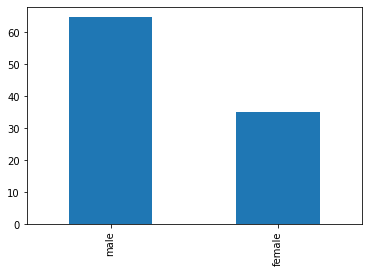

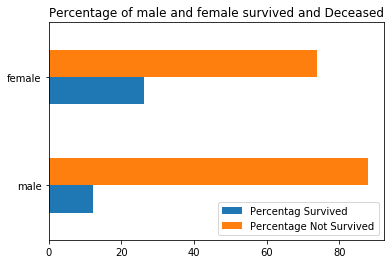

In [12]:
fig_sex=(trd.Sex.value_counts(normalize=True)*100).plot.bar()
male_pr=round((trd[trd.Sex=='male'].Survived==1).value_counts()[1]/len(trd.Sex)*100,2)
female_pr=round((trd[trd.Sex=='female'].Survived==1).value_counts()[1]/len(trd.Sex)*100,2)
sex_perc_df=pd.DataFrame(
{'Percentag Survived':{'male':male_pr, 'female':female_pr}, 'Percentage Not Survived':
{'male':100-male_pr, 'female':100-female_pr}})
sex_perc_df.plot.barh().set_title('Percentage of male and female survived and Deceased')


In [13]:
pd.DataFrame(td.Age.describe())

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


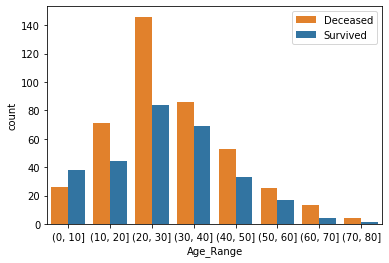

In [14]:
td['Age_Range']=pd.cut(td.Age, [0, 10, 20, 30, 40 ,50 ,60 ,70 ,80])
sns.countplot(x= 'Age_Range', hue='Survived', data=td, palette=['C1','C0']).legend(
labels=['Deceased','Survived'])

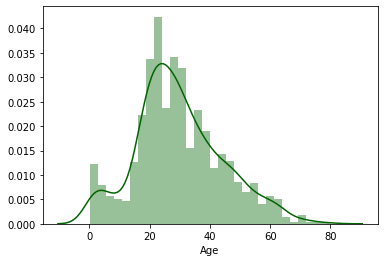

In [15]:
sns.distplot(td['Age'].dropna(),color='darkgreen',bins=30)

SibSP

In [16]:
td.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

Text(0.5, 1.0, 'Training Data-Number of siblings or spouses vs survival count')

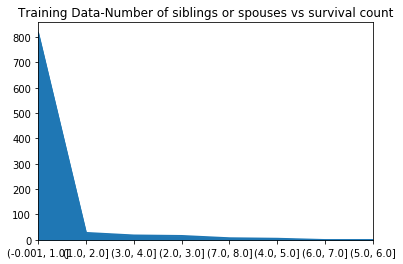

In [17]:
ss=pd.DataFrame()
ss['survived']=trd.Survived
ss['sibling_spouse']=pd.cut(trd.SibSp, [0,1,2,3,4,5,6,7,8], include_lowest=True)
(ss.sibling_spouse.value_counts()).plot.area().set_title('Training Data-Number of siblings or spouses vs survival count')

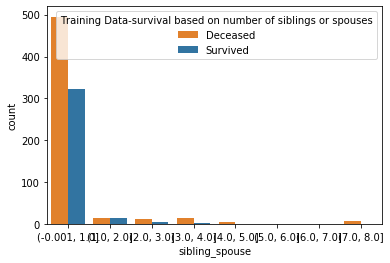

In [18]:
x=sns.countplot(x='sibling_spouse', hue='survived', data=ss, palette=['C1','C0']).legend(labels=['Deceased','Survived'])
x.set_title('Training Data-survival based on number of siblings or spouses')

9.Parch

In [19]:
pd.DataFrame(td.Parch.describe())

,Parch
count,1309.000000
mean,0.385027
std,0.865560
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


Text(0.5, 1.0, 'Training Data - Number of parents/children and survival density')

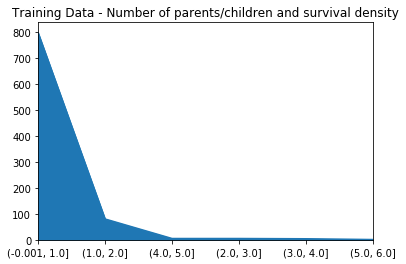

In [20]:
pc=pd.DataFrame()
pc['survived']=td.Survived
pc['parents_children']=pd.cut(trd.Parch,[0,1,2,3,4,5,6], include_lowest=True)
(pc.parents_children.value_counts()).plot.area().set_title("Training Data - Number of parents/children and survival density")

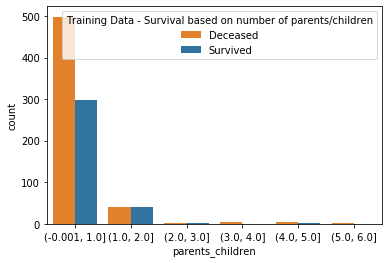

In [21]:
x = sns.countplot(x = "parents_children", hue = "survived", data = pc, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Training Data - Survival based on number of parents/children")

In [22]:
td['Family'] = td.Parch + td.SibSp
td['Is_Alone'] = td.Family == 0

11.Fare

In [23]:
td.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [24]:
td['Fare_Category']=pd.cut(td['Fare'], bins=[0,7.9,14.45,31.28,120], labels=['Low','Mid','Hugh_Mid','High'])


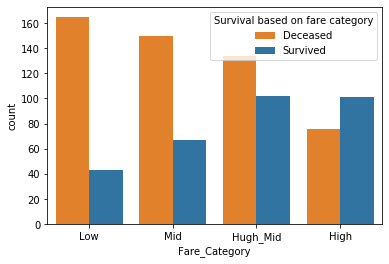

In [25]:
x=sns.countplot(x='Fare_Category', hue='Survived', data=td, palette=['C1','C0']).legend(labels=['Deceased','Survived'])
x.set_title('Survival based on fare category')

13.Embarked

Text(0.5, 1.0, 'Traning Data- Survival based on emberking point.')

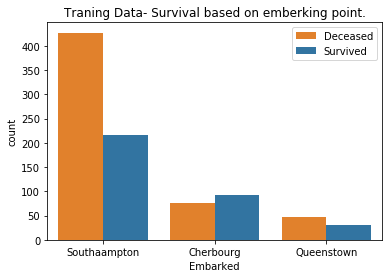

In [26]:
p=sns.countplot(x='Embarked', hue='Survived', data=trd, palette=['C1','C0'])
p.set_xticklabels(['Southaampton','Cherbourg','Queenstown'])
p.legend(labels=['Deceased','Survived'])
p.set_title('Traning Data- Survival based on emberking point.')

Data Imputation

In [27]:
td.Embarked.fillna(td.Embarked.mode()[0], inplace=True)

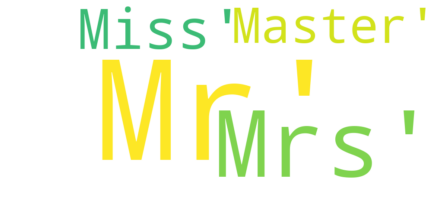

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Lady              1
Jonkheer          1
Dona              1
the Countess      1
Sir               1
Capt              1
Mme               1
Don               1
Name: Salutation, dtype: int64

In [28]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
td.Salutation.nunique()
wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(td.Salutation.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

td.Salutation.value_counts()

                       

In [29]:
grp = td.groupby(['Sex', 'Pclass'])  
td.Age = grp.Age.apply(lambda x: x.fillna(x.median()))

#If still any row remains
td.Age.fillna(td.Age.median, inplace = True)

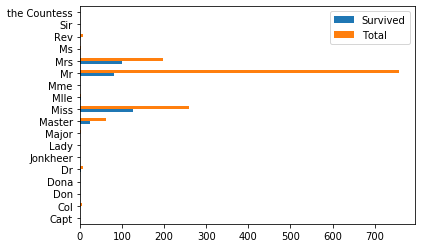

In [30]:
sal_df = pd.DataFrame({
    "Survived":
    td[td.Survived == 1].Salutation.value_counts(),
    "Total":
        td.Salutation.value_counts()
})
s = sal_df.plot.barh()


Cabin

In [31]:
td.Cabin = td.Cabin.fillna('NA')

Encoding & dropping columns

In [32]:
td = pd.concat([td,pd.get_dummies(td.Cabin, prefix="Cabin"),
                pd.get_dummies(td.Age_Range, prefix="Age_Range"), 
                pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True),
                pd.get_dummies(td.Salutation,prefix="Title", drop_first = True),
                pd.get_dummies(td.Fare_Category, prefix="Fare", drop_first = True),
                pd.get_dummies(td.Pclass, prefix="Class", drop_first = True)], axis=1)
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])
td['Is_Alone'] = LabelEncoder().fit_transform(td['Is_Alone'])

In [33]:

td.drop(['Pclass', 'Fare','Cabin', 'Fare_Category','Name','Salutation', 'Ticket','Embarked', 
         'Age_Range', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)


Prediction

Prediction algorithms used:

1.Gaussian Naive Bayes

2.Random Forest

In [40]:

# Data to be predicted
X_to_be_predicted = td[td.Survived.isna()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#Training data
train_data = td
train_data =  train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape #891 x 28



(891, 224)

In [36]:
train_data.head()

,PassengerId,Survived,Sex,Family,Is_Alone,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Fare_Mid,Fare_Hugh_Mid,Fare_High,Class_2,Class_3
0,1,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,1.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


NB Accuracy: 73.18%
The cross validated score for GNB is: 63.93


Text(0.5, 1.05, 'Confusion_matrix for NB')

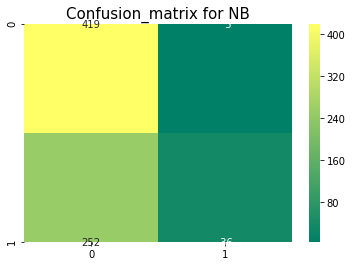

In [41]:
##Gaussian
clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train,test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("NB Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for GNB is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

In [64]:
##Random forest
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=13,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=7,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
#sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
#plt.title('Confusion_matrix for RF', y=1.05, size=15)

RF Accuracy: 85.47%
The cross validated score for Random forest is: 83.02


In [65]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv
